In [1]:
!pip install tensorflow-gpu==2.0.0-beta0 
!pip install  tfp-nightly

  Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-beta0 (from versions: 0.12.1, 1.0.0, 1.0.1, 1.1.0rc0, 1.1.0rc1, 1.1.0rc2, 1.1.0)
No matching distribution found for tensorflow-gpu==2.0.0-beta0


# 1.3 High-dimensional Data

## PixelCNN

In [1]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from utils import *
%matplotlib inline

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%reload_ext autoreload
%autoreload 2

In [2]:
np.random.seed(0)
tf.random.set_seed(0)
NUM_EPOCHS = 50
BATCH_SIZE = 128

In [3]:
with open('./mnist-hw1.pkl', 'rb') as fp:
    data = pickle.load(fp)

In [4]:
# Prepare for the train/val data set.
train_raw = data['train'].astype(np.float32)
test = data['test'].astype(np.float32)
np.random.shuffle(train_raw)

train = train_raw[:int(len(train_raw)*0.8)].astype(np.float32)
val = train_raw[int(len(train_raw)*0.8):].astype(np.float32)

train_dset = tf.data.Dataset.from_tensor_slices(train).\
                                repeat(1).batch(BATCH_SIZE)
val_dset = tf.data.Dataset.from_tensor_slices(val).\
                                    batch(BATCH_SIZE)
test_dset = tf.data.Dataset.from_tensor_slices(test).\
                                    batch(BATCH_SIZE)

In [5]:
pixel_cnn = PixelCNN(128, 3*4)

In [7]:
# Create metrics
loss_metric = tf.keras.metrics.Mean(name='train_loss')
val_loss_metric = tf.keras.metrics.Mean(name='val_loss')
test_loss_metric = tf.keras.metrics.Mean(name='test_loss')
optimizer = tf.keras.optimizers.Adam(0.0001)
train_loss_history = []
val_loss_history = []

# Define train/val steps
@tf.function
def train_step(x):
    with tf.GradientTape() as tape:
        x = tf.cast(x, tf.float32)
        prob = pixel_cnn(x)
        log_loss = nll(prob, x)
    var = pixel_cnn.trainable_variables
    gradients = tape.gradient(log_loss, var)
    optimizer.apply_gradients(zip(gradients, var))
    # Update the metrics
    loss_metric.update_state(log_loss)
 

@tf.function
def val_step(x):
    x = tf.cast(x, tf.float32)
    prob = pixel_cnn(x)
    log_loss = nll(prob, x)
    val_loss_metric.update_state(log_loss)
    

@tf.function
def test_step(x,idx):
    x = tf.cast(x, tf.float32)
    prob = pixel_cnn(x)
    log_loss = nll(prob, x)
    test_loss_metric.update_state(log_loss)
    tf.print('process batch {}/{}'.format(idx,len(test)//BATCH_SIZE))

In [46]:
for epoch in range(NUM_EPOCHS):
    # Reset the metrics
    loss_metric.reset_states()
    train_dset = train_dset.shuffle(buffer_size=10000)
    for train_data in train_dset:
        train_step(train_data)
        
    # Repeat the same process for val set
    val_loss_metric.reset_states()
    for val_data in val_dset:
        val_step(val_data)
    # Get the metric results
    mean_loss = loss_metric.result().numpy() * np.log2(np.e)
    mean_val_loss = val_loss_metric.result().numpy() * np.log2(np.e)
    train_loss_history.append(mean_loss)
    val_loss_history.append(mean_val_loss)

    print('Epoch: ', epoch)
    print('  train loss:     {:.3f}'.format(mean_loss))
    print('  val loss: {:.3f}'.format(mean_val_loss))

Epoch:  0
  train loss:     0.152
  val loss: 0.152
Epoch:  1
  train loss:     0.151
  val loss: 0.152


KeyboardInterrupt: ignored

In [ ]:
# make_dir('./test')
# pixel_cnn.save_weights('./test/test_weight', save_format='tf')

In [33]:
pixel_cnn.load_weights('./test/test_weight')

In [8]:
dummy = tf.Variable(train[:1])
out = pixel_cnn(dummy,training=True)
print(nll(out, dummy)*np.log2(np.e)) 
# 

tf.Tensor(2.112476, shape=(), dtype=float32)


In [9]:
pixel_cnn.

Model: "pixel_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
res_net_block (ResNetBlock)  multiple                  54217     
_________________________________________________________________
res_net_block_1 (ResNetBlock multiple                  54217     
_________________________________________________________________
res_net_block_2 (ResNetBlock multiple                  54217     
_________________________________________________________________
res_net_block_3 (ResNetBlock multiple                  54217     
_________________________________________________________________
res_net_block_4 (ResNetBlock multiple                  54217     
_________________________________________________________________
res_net_block_5 (ResNetBlock multiple                  54217     
_________________________________________________________________
res_net_block_6 (ResNetBlock multiple                  54

In [22]:
test_loss_metric.reset_states()
for idx,test_data in enumerate(test_dset):
    test_step(test_data,idx)
# Get the metric results
mean_test_loss = test_loss_metric.result().numpy()
#mean_test_loss = mean_test_loss*np.log2(np.e) 
print('  test loss: {:.3f}'.format(mean_test_loss))

process batch 0/78
process batch 1/78
process batch 2/78
process batch 3/78
process batch 4/78
process batch 5/78
process batch 6/78
process batch 7/78
process batch 8/78
process batch 9/78
process batch 10/78
process batch 11/78
process batch 12/78
process batch 13/78
process batch 14/78
process batch 15/78
process batch 16/78
process batch 17/78
process batch 18/78
process batch 19/78
process batch 20/78
process batch 21/78
process batch 22/78
process batch 23/78
process batch 24/78
process batch 25/78
process batch 26/78
process batch 27/78
process batch 28/78
process batch 29/78
process batch 30/78
process batch 31/78
process batch 32/78
process batch 33/78
process batch 34/78
process batch 35/78
process batch 36/78
process batch 37/78
process batch 38/78
process batch 39/78
process batch 40/78
process batch 41/78
process batch 42/78
process batch 43/78
process batch 44/78
process batch 45/78
process batch 46/78
process batch 47/78
process batch 48/78
process batch 49/78
process ba

In [33]:
print('test loss: {:.3f} bits/dim'.format(mean_test_loss*np.log2(np.e)))

test loss: 2.533 bits/dim


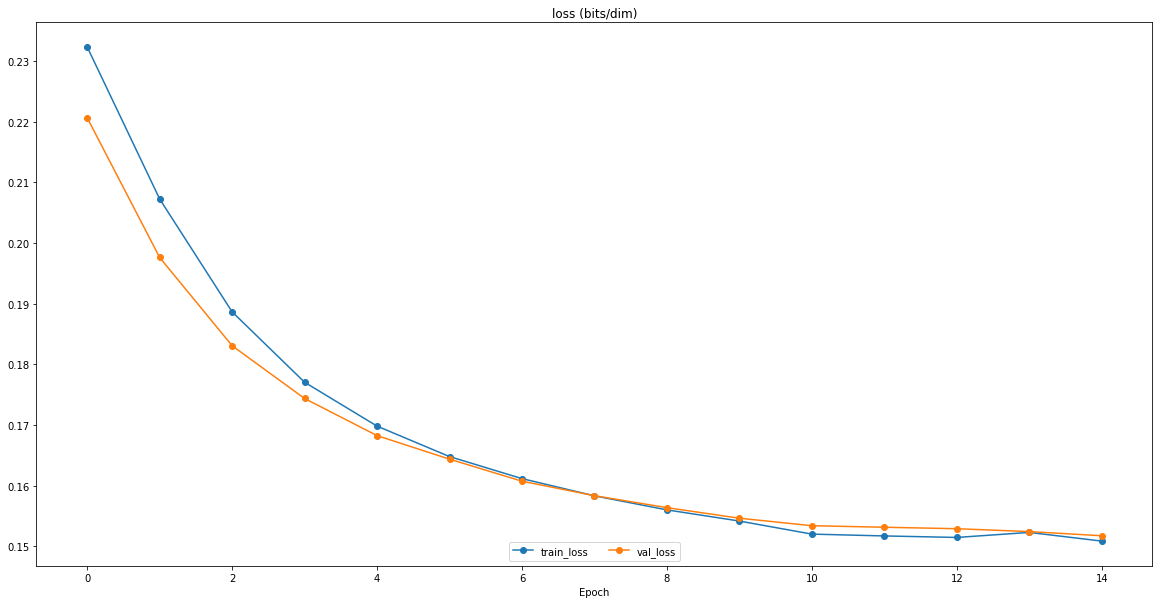

In [49]:
plot_training_history('loss (bits/dim)','Epoch', val_loss_history, [train_loss_history], 
                     train_marker='-o', val_marker='-o')
plt.gcf().set_size_inches(20, 10)
plt.show()

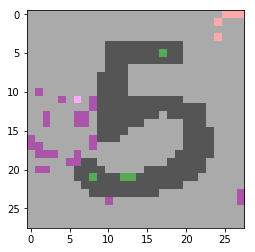

In [14]:
plt.imshow(train_raw[233].astype(np.int32) * 255 // 3)

In [9]:
img = sample_image(1, pixel_cnn)

i:0, j:0, k:0
[0.25 0.25 0.25 0.25]
i:0, j:0, k:1
[0.25 0.25 0.25 0.25]
i:0, j:0, k:2
[0.25 0.25 0.25 0.25]
i:0, j:1, k:0
[0.48385495 0.08534414 0.22447866 0.20632228]
i:0, j:1, k:1
[0.09565827 0.4385409  0.44190577 0.02389499]
i:0, j:1, k:2
[0.15863678 0.639822   0.05757987 0.14396134]
i:0, j:2, k:0
[0.295894   0.05824264 0.54468346 0.10117989]
i:0, j:2, k:1
[0.12496042 0.2574083  0.5842457  0.03338553]
i:0, j:2, k:2
[0.12237672 0.6864042  0.07134432 0.11987472]
i:0, j:3, k:0
[0.26819932 0.09351493 0.5126311  0.12565468]
i:0, j:3, k:1
[0.15591091 0.2751987  0.54010224 0.02878818]
i:0, j:3, k:2
[0.2105729  0.6689493  0.0514078  0.06907003]
i:0, j:4, k:0
[0.32416427 0.07117819 0.52085257 0.08380498]
i:0, j:4, k:1
[0.18031019 0.27772516 0.49685773 0.04510695]
i:0, j:4, k:2
[0.21010654 0.62101257 0.03810662 0.13077433]
i:0, j:5, k:0
[0.40627453 0.05616354 0.45358813 0.08397382]
i:0, j:5, k:1
[0.17475708 0.26806748 0.5162369  0.04093856]
i:0, j:5, k:2
[0.21560313 0.63045156 0.03843709 0.11

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(12, 12))
for k in range(4):
    for l in range(4):
        plt.subplot(4, 4, 4 * k + l + 1)        
        plt.imshow(img[4 * k + l].astype(np.uint8) * 255 // 3)
        plt.axis('off')
        plt.grid(False)
plt.show()

In [19]:
a = tf.one_hot(tf.Variable(test[:1],dtype=tf.uint8),depth=4)